# Using dataframes to explore data and make plots
In this example we'll see some ways to explore data that you can get from pygeodes and make plots

## Imports

In [1]:
from pygeodes import Geodes

## Configuration

In [2]:
geodes = Geodes()

## Searching items
Let's start by searching recent items in Africa : 

In [3]:
from pygeodes.utils.datetime_utils import complete_datetime_from_str

date = complete_datetime_from_str("2024-07-20")

items, dataframe = geodes.search_items(
    query={
        "spaceborne:continentsID": {"eq": "AF"},
        "temporal:endDate": {"gte": date},
    },
    return_df=True,
    get_all=False,
)

Found 7262 items matching your query, returning 500 as get_all parameter is set to False
500 item(s) found for query : {'spaceborne:continentsID': {'eq': 'AF'}, 'temporal:endDate': {'gte': '2024-07-20T00:00:00.000000Z'}}



Let's add to our result dataframe the column `spaceborne:cloudCover` : 

In [4]:
from pygeodes.utils.formatting import format_items

dataframe = format_items(dataframe, {"spaceborne:cloudCover"})

## Exploring data and adding colors in function of a parameter
### With numerical data
Now we can explore our data on a map and add colors corresponding to cloud cover : 

In [5]:
dataframe.explore(column="spaceborne:cloudCover", cmap="Blues")

### With literal data
It can also work with literal data, like `spaceborne:productLevel` : 

In [6]:
dataframe = format_items(dataframe, {"spaceborne:productLevel"})

In [7]:
dataframe.explore(column="spaceborne:productLevel", cmap="Dark2")

## Plotting data
You can also plot without the map canvas, for instance : 

<Axes: >

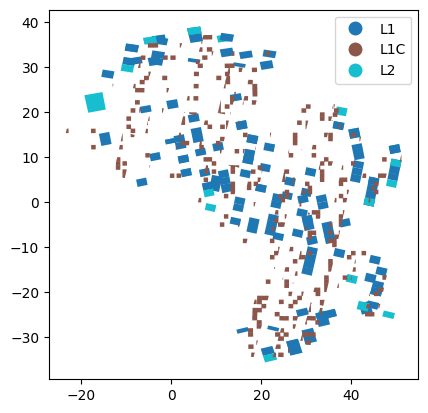

In [8]:
import matplotlib.pyplot as plt

dataframe.plot(column="spaceborne:productLevel", legend=True)

Or even plot without geometry, let's see : 

<Axes: ylabel='Frequency'>

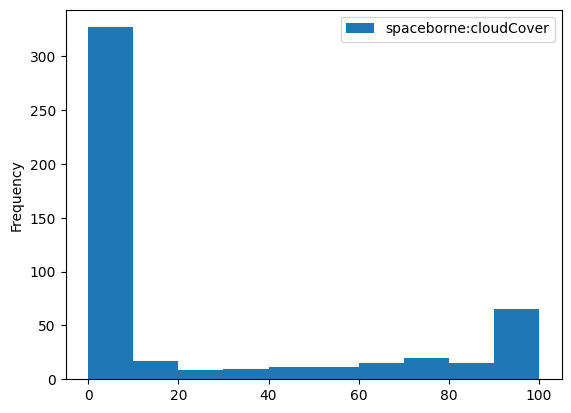

In [9]:
dataframe.plot(kind="hist", column="spaceborne:cloudCover", range=(0, 100))